In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv("data/feat_eng/feat-eng-value-impute-v2.csv")
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,Luxury Score,Facilities Categories,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,18000.0,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,0,0,0,0,1,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",1,1,0,NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...",19,Standard,"['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


In [5]:
# property_id	property_name link address1	address2 area	Super Built Up Carpet area	Plot Area	area_unit additionalRoom Overlooking WaterSource description	furnishDetails	Luxury Score features

In [6]:
#df.drop(columns = ['property_id', 'property_name', 'link', 'address1', 'address2','area','PricePerUnit','Super Built Up','Carpet area','Plot Area','area_unit','additionalRoom','Overlooking','WaterSource','description','furnishDetails','Luxury Score','features'],inplace = True)

In [7]:
#df.head()

In [8]:
df.isna().sum()

property_id                 0
property_name               0
property_type               0
link                        0
Society                  4583
Sector                      0
City                        0
address1                    0
address2                    4
PricePerUnit                0
area                        0
Super Built Up           5181
Built Up area               0
Carpet area              4435
Plot Area                5316
area_unit                   0
bedRoom                     0
bathroom                    0
balcony                     0
additionalRoom           3075
Pooja Room                  0
Servant Room                0
Store Room                  0
Study Room                  0
Other Room                  0
facing                   2146
FloorNo                     0
TotalFloors                 0
Overlooking              2147
Main Road                   0
Park/Garden                 0
Pool                        0
Club                        0
Overlook O

In [9]:
pd.options.display.max_rows = None

###  Power Backup

In [10]:
df['PowerBackup'].value_counts()

PowerBackup
Full       3788
Partial     795
Name: count, dtype: int64

In [11]:
len(df)

8429

In [12]:
df['PowerBackup'].fillna('No',inplace =True)

In [13]:
df['PowerBackup'].value_counts()

PowerBackup
No         3846
Full       3788
Partial     795
Name: count, dtype: int64

### agePossession

In [14]:
df[df['agePossession'].isna()]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,Luxury Score,Facilities Categories,features,price
7757,W75197063,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Sector 117 Mohali,Mohali,"Prestige Tower, Sector 117 Mohali , Mohali, Pu...","Sector 117 Mohali , Mohali, Punjab",4360.0,Super Built up area 1720(159.79 sq.m.) sq.ft.,1720.0,1455.0,NaN,NaN,sq.ft.,3,3,2,NaN,0,0,0,0,0,North-East,13,17,Main Road,1,0,0,0,0,NaN,Marble,No,Unfurnished,1,1,60.0,NaN,0,0,0,Partial,No,No,3bhk flat available for sale prestige towers s...,NaN,26,Standard,"['Maintenance Staff', 'Swimming Pool', 'Park',...",0.75
8230,A75791355,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,SBP City of Dreams,Sector 127 Mohali,Mohali,"SBP City of Dreams, Sector 127 Mohali, Mohali,...","I - 6177, Sector 127 Mohali, Mohali, Punjab",4415.0,Super Built up area 1359(126.26 sq.m.) sq.ft.,1359.0,1150.0,NaN,NaN,sq.ft.,2,2,2,NaN,0,0,0,0,0,East,6,12,"Club,Park/Garden,Pool",0,1,1,1,0,NaN,NaN,Yes,Unfurnished,0,2,NaN,24*7 Water,1,0,0,Full,No,No,The usp is \n1. Mivan construction. No leakage...,NaN,40,Premium,"['Power Back-up', 'Lift(s)', 'No open drainage...",0.55
8251,R75720099,1BHK 1Bath,Flat/Apartment,https://www.99acres.com/1-bhk-bedroom-apartmen...,SBP City of Dreams,Sector 127 Mohali,Mohali,"SBP City of Dreams, Sector 127 Mohali, Mohali,...","Sector 127 Mohali, Mohali, Punjab",4714.0,Super Built up area 700(65.03 sq.m.) sq.ft.,700.0,592.0,NaN,NaN,sq.ft.,1,1,2,NaN,0,0,0,0,0,South-East,5,12,"Club,Park/Garden,Pool",0,1,1,1,0,NaN,Marble,Yes,Semifurnished,1,0,50.0,"24*7 Water,Borewell/Tank,Municipal corporation",1,1,1,Full,No,Yes,Pay 16lac & get 16000/month assured return til...,"['1 Wardrobe', '1 Exhaust Fan', '1 Geyser', '2...",43,Premium,"['Lift(s)', 'Water purifier', 'High Ceiling He...",0.33


In [15]:
# 7757 - UndConst
# 8230 - UndConst
# 8251 - UndConst

In [16]:
df['agePossession'].value_counts()

agePossession
New         2987
Old         1731
RelNew      1681
ModOld      1039
UndConst     988
Name: count, dtype: int64

In [17]:
df['agePossession'].fillna('UndConst',inplace = True)

In [18]:
df.isna().sum()[df.isna().sum() > 0]

Society           4583
address2             4
Super Built Up    5181
Carpet area       4435
Plot Area         5316
additionalRoom    3075
facing            2146
Overlooking       2147
Flooring          2143
RoadFacing        3716
WaterSource       1649
furnishDetails    2049
dtype: int64

### facing

In [19]:
print(f"Missing Percentage: {round(df['facing'].isnull().sum() / len(df) * 100,2)}%")

Missing Percentage: 25.46%


In [20]:
df['facing'].value_counts()

facing
East          2212
North-East    1957
North          622
North-West     453
South-East     392
West           351
South-West     179
South          117
Name: count, dtype: int64

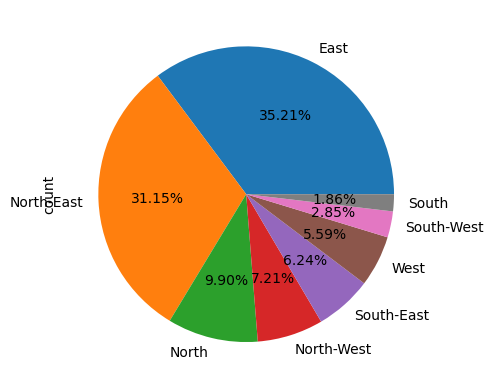

In [21]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [22]:
# we will fill this column on the basis of mode of facing in each sector

In [23]:
df['Sector'].value_counts()

Sector
Zirakpur                 1765
Kharar                    489
Sector 66 Mohali          285
Mullanpur                 280
Pinjore                   228
Aerocity                  216
Sector 88 Mohali          216
Sector 127 Mohali         170
Sector 115 Mohali         160
New Chandigarh            146
Sector 91 Mohali          138
Sector 125 Mohali         133
Sector 82 Mohali          105
Sector 20 Panchkula       102
Peer Muchalla             100
Sector 126 Mohali          96
Dera Bassi                 90
Sector 21 Chandigarh       86
Sector 117 Mohali          83
Sector 38 Chandigarh       79
Sector 15 Panchkula        77
Sector 21 Panchkula        76
Sector 49 Chandigarh       74
Sector 35 Chandigarh       72
Phase 3 Mohali             65
Sector 48 Chandigarh       65
Sector 44 Chandigarh       64
Sector 85 Mohali           63
Sector 99 Mohali           63
Sector 71 Mohali           62
Sector 70 Mohali           61
Sector 79 Mohali           61
Sector 105 Mohali          60
Sec

In [24]:
## To fill missing values

In [25]:
for i in df.index:
    if pd.isna(df.at[i, 'facing']):
        try:
            sect = df['Sector'].loc[i]
            df['facing'].loc[i] =  df[df['Sector'] == sect]['facing'].mode().values[0]
        except:
            df['facing'].loc[i] = 'East'

In [26]:
df['facing'].loc[6] == 'nan'

False

In [27]:
pd.isna(df.at[5, 'facing'])

False

In [28]:
df['facing'].value_counts()

facing
East          3456
North-East    2636
North          707
North-West     539
South-East     417
West           377
South-West     180
South          117
Name: count, dtype: int64

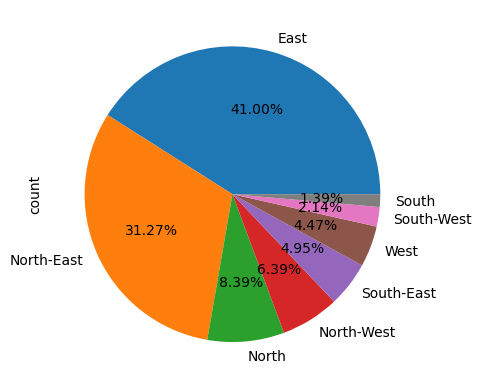

In [29]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [30]:
df.isna().sum()[df.isna().sum() > 0]

Society           4583
address2             4
Super Built Up    5181
Carpet area       4435
Plot Area         5316
additionalRoom    3075
Overlooking       2147
Flooring          2143
RoadFacing        3716
WaterSource       1649
furnishDetails    2049
dtype: int64

### Flooring

In [31]:
df['Flooring'].value_counts()

Flooring
Vitrified            2700
Marble               1822
Ceramic               624
Granite               349
Wood                  210
Mosaic                193
Others                151
Concrete              140
Stone                  48
Cement                 23
Polished concrete      11
Vinyl                   7
Spartex                 5
IPSFinish               3
Name: count, dtype: int64

In [32]:
temp = df['Flooring'].value_counts().reset_index()

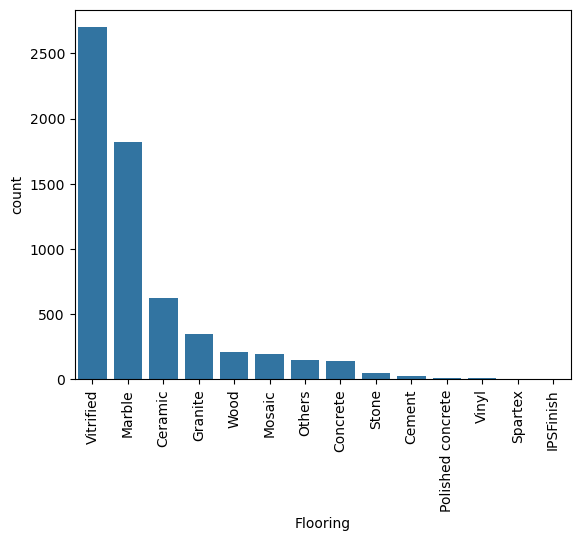

In [33]:
sns.barplot(data = temp,x = temp['Flooring'],y = temp['count'])
plt.xticks(rotation=90)
plt.show()

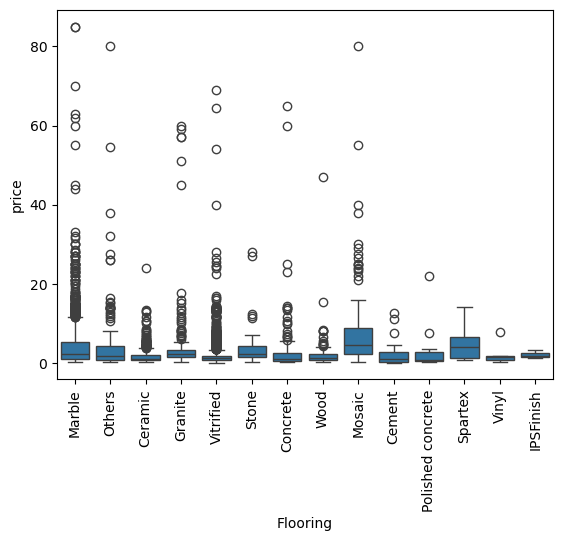

In [34]:
sns.boxplot(df,x='Flooring',y='price')
plt.xticks(rotation=90)
plt.show()

In [35]:
df['agePossession'].value_counts()

agePossession
New         2987
Old         1731
RelNew      1681
ModOld      1039
UndConst     991
Name: count, dtype: int64

In [36]:
for i in df['agePossession'].value_counts().index:
    print(f"{i} : {df[df['agePossession'] == i ]['Flooring'].mode().values[0]}")

New : Vitrified
Old : Marble
RelNew : Vitrified
ModOld : Vitrified
UndConst : Vitrified


Above experiment shows that most old properties have marble flooring whereas newer propeties have vitrified flooring.

Therefore we will fill missing values of old properties with Marble and others with Vitrified.

In [37]:
for i in df.index:
    if pd.isna(df.at[i, 'Flooring']):
        if df['agePossession'].loc[i] == 'Old':
            df['Flooring'].loc[i] = 'Marble'
        else:
            df['Flooring'].loc[i] = 'Vitrified'

In [38]:
df['Flooring'].value_counts()

Flooring
Vitrified            4254
Marble               2411
Ceramic               624
Granite               349
Wood                  210
Mosaic                193
Others                151
Concrete              140
Stone                  48
Cement                 23
Polished concrete      11
Vinyl                   7
Spartex                 5
IPSFinish               3
Name: count, dtype: int64

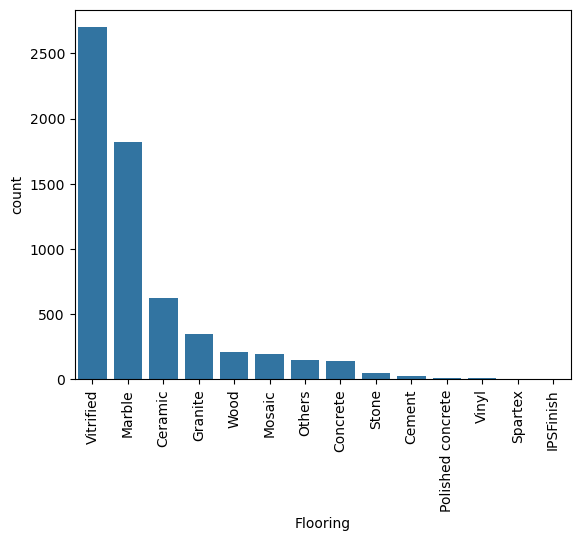

In [39]:
sns.barplot(data = temp,x = temp['Flooring'],y = temp['count'])
plt.xticks(rotation=90)
plt.show()

In [41]:
df.to_csv("data/final-imputed/final-full-imputed-v1.csv",index = False)